In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
pd.options.display.float_format = '{:.5f}'.format

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv', parse_dates = ['Datetime'])
train.head()

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
0,ID_QF0ZTQJ2SF5Q,2021-11-03 04:06:31,52.58000,49.52000,17.40000,96.00000,0
1,ID_4GTK689CNX5S,2021-11-08 18:43:23,35.25000,33.40000,25.00000,75.00000,0
2,ID_DL7VVKW9U7XQ,2021-11-07 09:50:33,19.18000,23.50000,24.90000,75.00000,0
3,ID_6XQOMBXM2DG3,2022-01-01 18:55:15,19.40000,15.48000,24.90000,70.00000,0
4,ID_UQZW9ISJY9QE,2021-11-05 22:23:48,38.30000,34.77000,20.90000,89.00000,0


In [3]:
test = pd.read_csv('test.csv', parse_dates = ['Datetime'])
samplesubmission = pd.read_csv('SampleSubmission.csv')

In [4]:
test.head()

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity
0,ID_STL3V9B2OU12,2022-01-28 08:49:41,90.75000,114.78000,22.20000,56.00000
1,ID_U2EKAY4SGA94,2022-02-16 21:30:17,56.03000,52.18000,nan,nan
2,ID_UJFLEWQR0U4N,2022-01-24 17:57:18,387.35000,346.73000,28.10000,63.00000
3,ID_S2C2GPGA4R5I,2022-01-31 07:07:09,63.17000,83.85000,21.60000,82.00000
4,ID_5V2C2ZL221H8,2022-01-31 00:37:05,69.23000,53.07000,22.70000,80.00000


In [5]:
train.shape, test.shape

((297177, 7), (127361, 6))

In [6]:
train.isna().sum()

ID                      0
Datetime                0
Sensor1_PM2.5        3614
Sensor2_PM2.5        3614
Temperature          3549
Relative_Humidity    3549
Offset_fault            0
dtype: int64

In [7]:
# first, import the SimpleImputer class
from sklearn.impute import SimpleImputer

# using the mean strategy on the Imputer object and
# missing_values type for imputation
imputer = SimpleImputer(missing_values = np.nan,
						strategy ='mean')

In [8]:
train .columns

Index(['ID', 'Datetime', 'Sensor1_PM2.5', 'Sensor2_PM2.5', 'Temperature',
       'Relative_Humidity', 'Offset_fault'],
      dtype='object')

In [12]:
train.dtypes

ID                           object
Datetime             datetime64[ns]
Sensor1_PM2.5               float64
Sensor2_PM2.5               float64
Temperature                 float64
Relative_Humidity           float64
Offset_fault                  int64
dtype: object

In [13]:
train[['Sensor1_PM2.5', 'Sensor2_PM2.5', 'Temperature', 'Relative_Humidity']] = \
imputer.fit_transform(train[['Sensor1_PM2.5', 'Sensor2_PM2.5', 'Temperature', 'Relative_Humidity']])
train.head()

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
0,ID_QF0ZTQJ2SF5Q,2021-11-03 04:06:31,52.58000,49.52000,17.40000,96.00000,0
1,ID_4GTK689CNX5S,2021-11-08 18:43:23,35.25000,33.40000,25.00000,75.00000,0
2,ID_DL7VVKW9U7XQ,2021-11-07 09:50:33,19.18000,23.50000,24.90000,75.00000,0
3,ID_6XQOMBXM2DG3,2022-01-01 18:55:15,19.40000,15.48000,24.90000,70.00000,0
4,ID_UQZW9ISJY9QE,2021-11-05 22:23:48,38.30000,34.77000,20.90000,89.00000,0


In [14]:
train.isna().sum()

ID                   0
Datetime             0
Sensor1_PM2.5        0
Sensor2_PM2.5        0
Temperature          0
Relative_Humidity    0
Offset_fault         0
dtype: int64

#### Check for outliers values

In [16]:
columns = train.columns

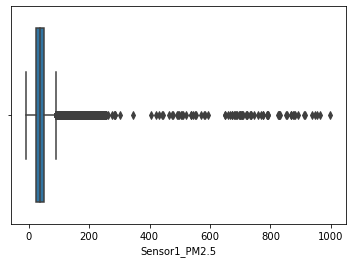

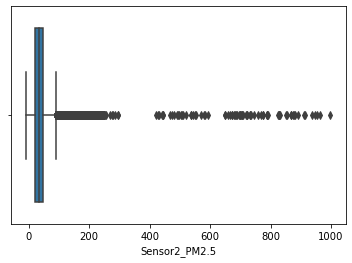

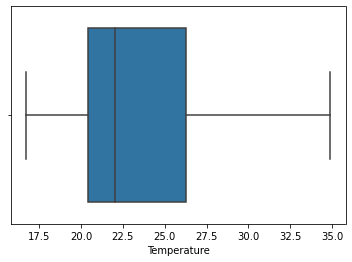

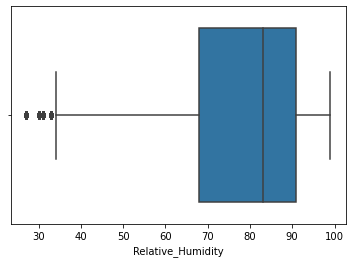

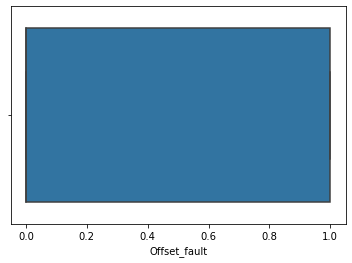

In [17]:
import seaborn as sns
for x in columns[2:]:
    sns.boxplot(train[x])
    plt.show()

In [18]:
cols = ['Sensor1_PM2.5', 'Sensor2_PM2.5', 'Relative_Humidity'] # one or more

Q1 = train[cols].quantile(0.25)
Q3 = train[cols].quantile(0.75)
IQR = Q3 - Q1

train = train[~((train[cols] < (Q1 - 1.5 * IQR)) |(train[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

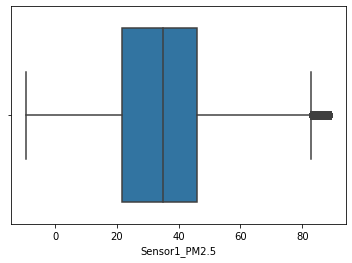

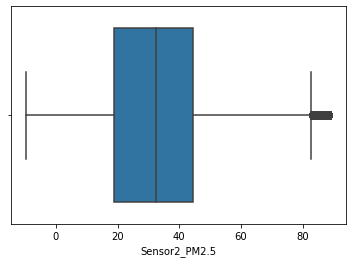

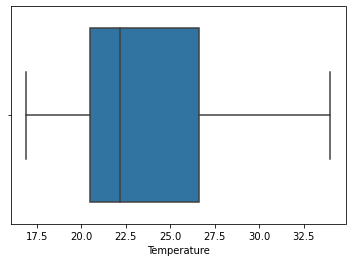

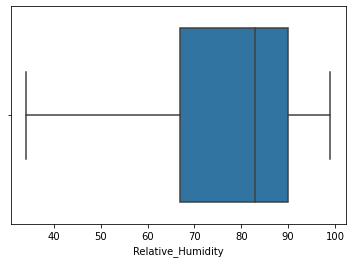

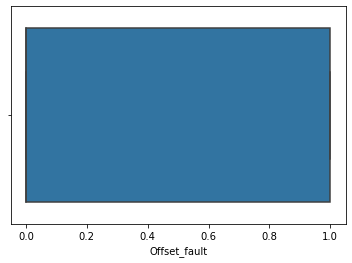

In [19]:
for x in columns[2:]:
    sns.boxplot(train[x])
    plt.show()

In [21]:
# Extract day, month year and hour from the Datetime column
# day
train['Datetime_day'] = train.Datetime.dt.day

# month
train['Datetime_month'] = train.Datetime.dt.month
 
# year
train['Datetime_year'] = train.Datetime.dt.year

# hour
train['Datetime_hour'] = train.Datetime.dt.hour

# Preview engineered date features
train[['Datetime', 'Datetime_day', 'Datetime_month', 'Datetime_year', 'Datetime_hour']].head()

,Datetime,Datetime_day,Datetime_month,Datetime_year,Datetime_hour
0,2021-11-03 04:06:31,3,11,2021,4
1,2021-11-08 18:43:23,8,11,2021,18
2,2021-11-07 09:50:33,7,11,2021,9
3,2022-01-01 18:55:15,1,1,2022,18
4,2021-11-05 22:23:48,5,11,2021,22


In [22]:
train.shape

(275541, 11)

In [23]:
# Selecting the independent variables and the target variable
train_feats = ['Sensor1_PM2.5',	'Sensor2_PM2.5',	'Temperature',	'Relative_Humidity',	'Datetime_day',\
               'Datetime_month',	'Datetime_year', 'Datetime_hour']

X = train[train_feats]
y = train.Offset_fault

In [40]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42, shrinkage=0.1)

X_resampled, y_resampled = ros.fit_resample(X, y)

y_resampled.value_counts()

1    168231
0    168231
Name: Offset_fault, dtype: int64

In [43]:
len(X_resampled), len(y_resampled)

(336462, 336462)

In [44]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.3, random_state = 0, stratify=y_resampled)
# Instantiating the model
clf = RandomForestClassifier(max_depth = 3, random_state = 0)
clf.fit(X_train, y_train)

# Making predictions
y_pred = clf.predict(X_test)

# Measuring the accuracy of the model
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')

Accuracy score: 0.678865453392643


              precision    recall  f1-score   support

           0       0.71      0.60      0.65     50470
           1       0.65      0.76      0.70     50469

    accuracy                           0.68    100939
   macro avg       0.68      0.68      0.68    100939
weighted avg       0.68      0.68      0.68    100939



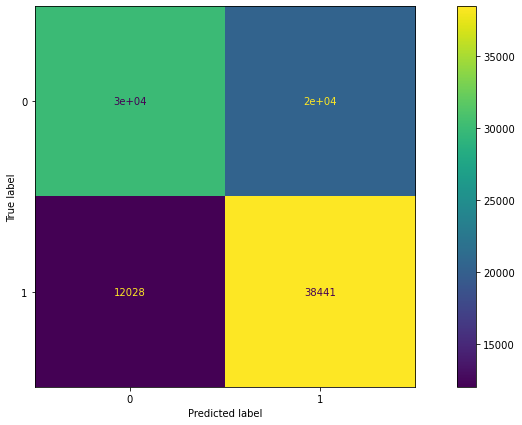

In [45]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
fig, ax = plt.subplots(figsize=(15,7))
disp.plot(ax=ax)
plt.show()

In [46]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)

# Making predictions
y_pred = xgb_model.predict(X_test)

# Measuring the accuracy of the model
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')

[16:52:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score: 0.9556464795569601


              precision    recall  f1-score   support

           0       0.96      0.96      0.96     50470
           1       0.96      0.96      0.96     50469

    accuracy                           0.96    100939
   macro avg       0.96      0.96      0.96    100939
weighted avg       0.96      0.96      0.96    100939



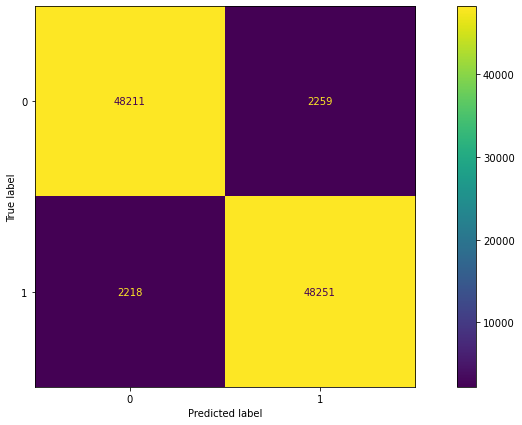

In [47]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
fig, ax = plt.subplots(figsize=(15,7))
disp.plot(ax=ax)
plt.show()

In [28]:
test.head()

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity
0,ID_STL3V9B2OU12,2022-01-28 08:49:41,90.75000,114.78000,22.20000,56.00000
1,ID_U2EKAY4SGA94,2022-02-16 21:30:17,56.03000,52.18000,nan,nan
2,ID_UJFLEWQR0U4N,2022-01-24 17:57:18,387.35000,346.73000,28.10000,63.00000
3,ID_S2C2GPGA4R5I,2022-01-31 07:07:09,63.17000,83.85000,21.60000,82.00000
4,ID_5V2C2ZL221H8,2022-01-31 00:37:05,69.23000,53.07000,22.70000,80.00000


In [29]:
test.dtypes

ID                           object
Datetime             datetime64[ns]
Sensor1_PM2.5               float64
Sensor2_PM2.5               float64
Temperature                 float64
Relative_Humidity           float64
dtype: object

In [31]:
test.shape

(127361, 6)

In [30]:
test.isna().sum()

ID                       0
Datetime                 0
Sensor1_PM2.5            0
Sensor2_PM2.5            0
Temperature          88090
Relative_Humidity    88090
dtype: int64

In [32]:
test[['Temperature', 'Relative_Humidity']] = \
imputer.fit_transform(test[['Temperature', 'Relative_Humidity']])
test.head()

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity
0,ID_STL3V9B2OU12,2022-01-28 08:49:41,90.75000,114.78000,22.20000,56.00000
1,ID_U2EKAY4SGA94,2022-02-16 21:30:17,56.03000,52.18000,23.68384,72.21583
2,ID_UJFLEWQR0U4N,2022-01-24 17:57:18,387.35000,346.73000,28.10000,63.00000
3,ID_S2C2GPGA4R5I,2022-01-31 07:07:09,63.17000,83.85000,21.60000,82.00000
4,ID_5V2C2ZL221H8,2022-01-31 00:37:05,69.23000,53.07000,22.70000,80.00000


In [34]:
test.isna().sum()

ID                   0
Datetime             0
Sensor1_PM2.5        0
Sensor2_PM2.5        0
Temperature          0
Relative_Humidity    0
dtype: int64

In [35]:
test['Datetime_day'] = test.Datetime.dt.day

# month
test['Datetime_month'] = test.Datetime.dt.month
 
# year
test['Datetime_year'] = test.Datetime.dt.year

# hour
test['Datetime_hour'] = test.Datetime.dt.hour

# Preview engineered date features
test[['Datetime', 'Datetime_day', 'Datetime_month', 'Datetime_year', 'Datetime_hour']].head()

,Datetime,Datetime_day,Datetime_month,Datetime_year,Datetime_hour
0,2022-01-28 08:49:41,28,1,2022,8
1,2022-02-16 21:30:17,16,2,2022,21
2,2022-01-24 17:57:18,24,1,2022,17
3,2022-01-31 07:07:09,31,1,2022,7
4,2022-01-31 00:37:05,31,1,2022,0


In [37]:
test.dtypes

ID                           object
Datetime             datetime64[ns]
Sensor1_PM2.5               float64
Sensor2_PM2.5               float64
Temperature                 float64
Relative_Humidity           float64
Datetime_day                  int64
Datetime_month                int64
Datetime_year                 int64
Datetime_hour                 int64
dtype: object

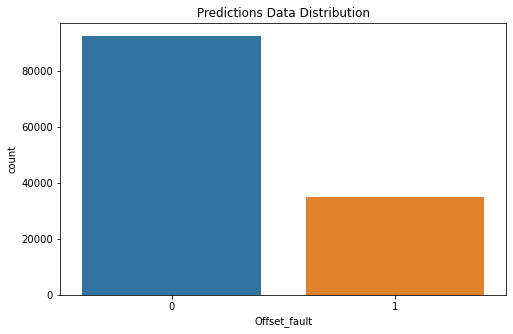

In [48]:
# Make prediction on the test set
test_df = test[train_feats]
predictions = xgb_model.predict(test_df)

# # Create a submission file
sub_file = samplesubmission.copy()
sub_file.Offset_fault = predictions

# Check the distribution of your predictions
plt.figure(figsize=(8, 5))
sns.countplot(sub_file.Offset_fault)
plt.title('Predictions Data Distribution');

In [49]:
# Create file
sub_file.to_csv('submit8.csv', index = False)